# US Airports On-Time Performance 2019 Q1
## by Sophie Wang

## Investigation Overview
This presentation is created to describe the on-time performance of US airports in the first quarter of 2019. It first gives an overview of delayed flights as a proportion of the total. It then dives deeper into flights by delay causes and top 5 most/least punctual airports measured by on-time departure rate in each size category. It ends with the ranking of on-time rate by carriers. 

## Dataset Overview
There are two datasets investigated. 
The first one is the marketing airline on-time performance data provided by Bureau of Transport Statistics. The dataset includes all US domestic flights in the first quarter of 2019 with scheduled departure/arrival time slots and actual ones. 
The second one comes from Wikipedia page on US airport category. This dataset provides information about FAA category of each individual airport in the US.

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
# load in the dataset into a pandas dataframe
flt_data_cleaned = pd.read_csv('flt_data_cleaned.csv', index_col = False)
delay_subset = pd.read_csv('delay_subset.csv', index_col = False)
category_subset = pd.read_csv('category_subset.csv', index_col = False)
ontime_carrier = pd.read_csv('ontime_carrier.csv', index_col = False)

## On-time vs. Delayed Flights Overview

> In the first quarter of 2019, approximately 1,911 thousands US domestic flights were operated, out of which 1,513 thousands departed on time or 79.2%. On the other hand, 398 thousands flights were delayed (delay time equal to or greater than 15 minutes), representing 20.8% of the total.

Text(0.5, 1.0, 'Proportion of On-time vs. Delayed Flights')

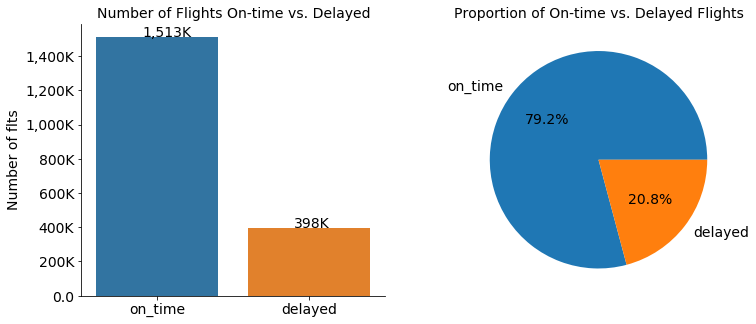

In [5]:
#format axis tick label
def reformat_large_tick_values(tick_val, pos):
    if tick_val >= 1000:
        val = round(tick_val/1000, 0)
        new_tick_format = '{:,.0f}K'.format(val)
        # make new_tick_format into a string value
        tick_format = str(new_tick_format)
    else: 
        tick_format = str(tick_val)
    return tick_format

#subplot
plt.figure(figsize = [12,5])
data = flt_data_cleaned["on_time"].value_counts()
labels = data.index

#subplot1
plt.subplot(1,2,1)
ax = sb.countplot(data = flt_data_cleaned, x = "on_time")
for i, v in data.reset_index().iterrows():
    ax.text(i-0.1, v.on_time + 0.2 , '{:,.0f}K'.format(v.on_time/1000), color='black')

#format x and y axis and labels
import matplotlib as mpl
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(reformat_large_tick_values))
plt.xlabel("")
plt.ylabel("Number of flts")
# get rid of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#set title
plt.title("Number of Flights On-time vs. Delayed")

#subplot 2
plt.subplot(1,2,2)
plt.pie(data,labels = labels, autopct = '%1.1f%%')
plt.title('Proportion of On-time vs. Delayed Flights')
       

## Number of Delayed Flights by Cause

> Late aircraft arrival is the major reason for flight delays, followed by carrier-related issues such as maintenance, operations. The third biggest driver for late flights concern National Air System issues such as air traffic congestion. Interestingly, delays caused by weather or security line-up at airports are very few compared with the first three causes. 
In terms of distribution, most of the flights delayed for less than 60 minutes. It's very rare for any flight to be delayed for more than 2 hours.

Text(0.5, 0.98, 'Distribution of Delayed Flights by Cause')

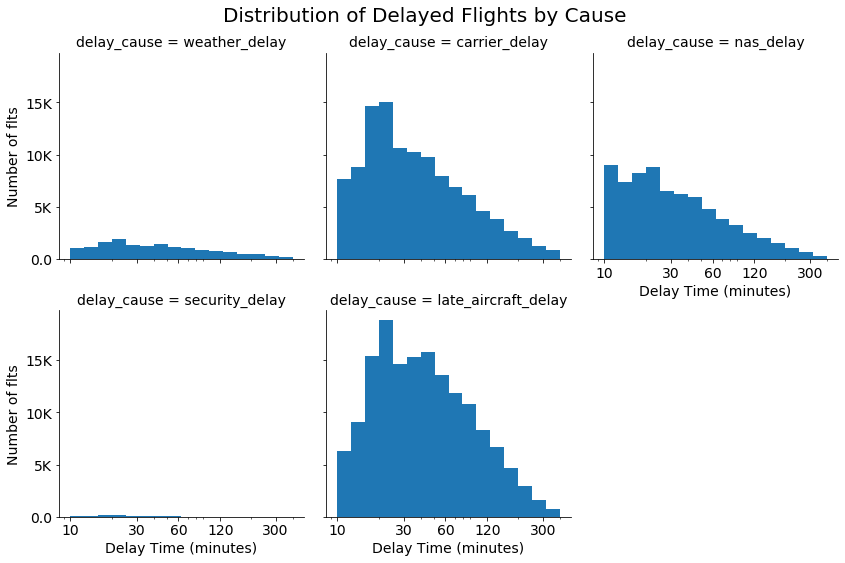

In [7]:
#Create a facetgrid to compare different causes.

#set grid
g = sb.FacetGrid(data = delay_subset, col = "delay_cause", height = 4, col_wrap = 3, margin_titles = True)

#plot
bin_edges = 10**np.arange(1, np.log10(500),0.1 )
g.map(plt.hist, "delay_time", bins = bin_edges)

#set x scale transformation
plt.xscale("log")
tick_locs = [10,30,60,120,300]



# Iterate thorugh each axis and set axis labels, tciks and tick labels
for i in range(len(g.axes.flat)):
    g.axes.flat[i].set_xticks(tick_locs)
    g.axes.flat[i].set_xticklabels(tick_locs)
    if (i ==0) or (i ==3):
        g.axes.flat[i].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(reformat_large_tick_values))
        g.axes.flat[i].set_ylabel('Number of flts')
    if (i==2) or (i==3) or (i==4):
        g.axes.flat[i].set_xlabel("Delay Time (minutes)")

#set title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Delayed Flights by Cause')

## Average Delay Time by Cause

>On average, delay time due to late aircraft arrival amounts to 35 minutes, compared with 27 minutes caused by carrier-related issues, 14 minutes due to problems concerning national air system. Delay time by security is negligible.


<Figure size 1440x504 with 0 Axes>

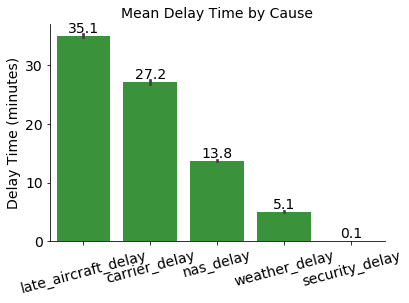

<Figure size 1440x504 with 0 Axes>

In [16]:
#set color
base_color = sb.color_palette()[2]

#create sorted dataframe 
sort = delay_subset.groupby('delay_cause')['delay_time'].mean().reset_index().\
           sort_values(by = 'delay_time',ascending = False)
order = sort['delay_cause']

#create plot
ax = sb.barplot(data = delay_subset, x = 'delay_cause', y = "delay_time",order = order,color = base_color)

#add label to each bar
for i, v in enumerate(sort['delay_time'].iteritems()):        
    ax.text(i ,v[1], '{:.1f}'.format(v[1]), color='black', va ='bottom', ha = 'center')
ax.set_ylabel('Delay Time (minutes)')

#polish plot and add title
plt.xticks(rotation = 15)
plt.xlabel("")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Mean Delay Time by Cause")
plt.figure(figsize = [20,7])

## Top 5 Most Punctual US Airports by Size Category
(measured by number of on-time departures over total flights)
>Honolulu(IATA airport code:HNL) ranks first in terms of on-time departure among all large airports in the US thanks in part to its favorable weather all-year round. Portland comes in second, followed by Atlanta (ATL), Philadelphia(PHL) and Salt Lake City(SLC).
In the medium size category, Anchorage(ANC) tops the chart. It's followed by Kahului(OGG), the airport serving Maui. San Antonio, El Paso, both in Texas, along with Jacksonville in Florida, rank from third to fifth.
Hilo(ITO), another Hawaiian airport, is crowned in the small size category for its stellar on-time performance. It achieved a 92.2% on-time departure rate in the first quarter of 2019. The other winners in this category are: Atlantic City(ACY), Fairbanks(FAI), Clearwater(PIE) and Guam(GUM).

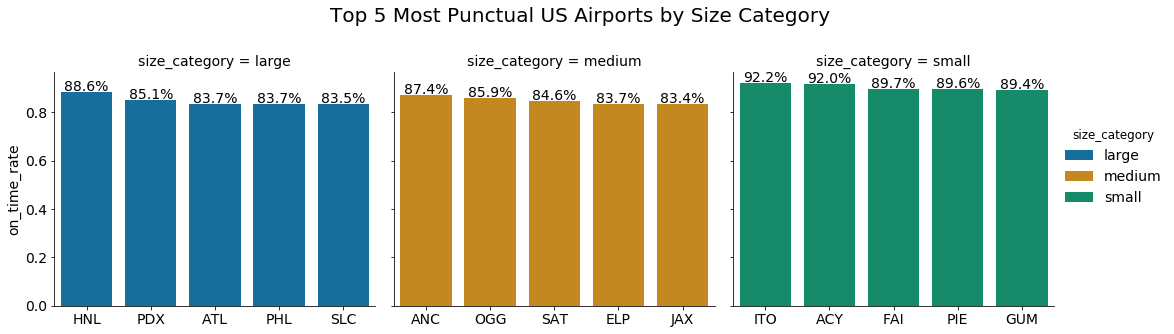

In [21]:

#turn size_category to ordered categorical data type
order = ['large', 'medium', 'small']
ordered_category = pd.api.types.CategoricalDtype(ordered = True, categories = order)
category_subset['size_category'] = category_subset['size_category'].astype(ordered_category)

#select top/bottom 5 airports and put them in variables
top_5 = category_subset.sort_values('on_time_rate',ascending = False).\
                                  groupby('size_category').head(5)
bottom_5 = category_subset.sort_values('on_time_rate',ascending = False).groupby('size_category').tail(5)

#set grid
g = sb.FacetGrid(data = top_5, col = 'size_category', height = 5,sharex= False, hue = "size_category",\
                 palette = "colorblind")
#create plot 
g.map(sb.barplot, "origin", 'on_time_rate') 

#add value label to each bar
for ax in g.axes.flat:
    for p in ax.patches:
             ax.annotate('{:,.1%}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), size = 14,
                 textcoords='offset points')

#correct x tick labels
for idx, v in enumerate(top_5.size_category.cat.categories):
    g.axes.flat[idx].set_xticklabels(top_5[top_5.size_category == v]['origin'])
    g.axes.flat[idx].set_xlabel("")
    
#set title
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Top 5 Most Punctual US Airports by Size Category')
g.add_legend()


## Top 5 Least Punctual US Airports by Size Category

>It's interesting to see that 4 out of the five least Punctual performers in the large airport category concentrate in New York (Laguardia LGA and Newark EWR) and Chicago (O'Hare ORD and Midway MDW). And the remaining one serves San Francisco (SFO). The worst of the top 5 Chicago Midway, saw only 63.5% of its flights depart on-time in the first quarter of 2019
Among the medium-sized airports, Oakland, another airport in the Bay Area, makes to the list. West Palm Beach(PBI), St. Louis(STL), Dallas Love Field and Houston make up for the rest. The worst of all is Houston, which scored a 74.4% on-time departure rate.
The top 5 least punctual small US airports concentrate in the Midwest: Grand Rapids(GRR) in Michigan, Sioux Falls(FSD) in North Dakota, Eastern Iowa(CID), Fargo(FAR) in North Dakota. There is only one exception Burlington(BTV) in Vermont.

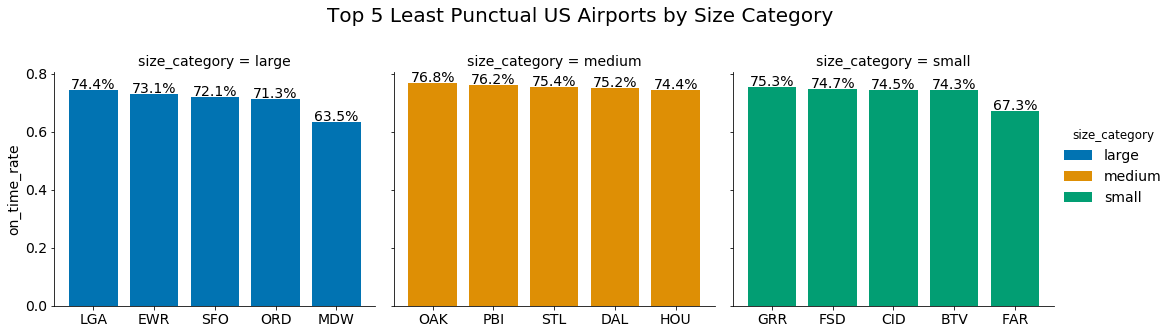

In [20]:
#set grid
g = sb.FacetGrid(data = bottom_5, col = 'size_category', height = 5,sharex= False, hue = 'size_category',\
palette = "colorblind")

#create plot
g.map(plt.bar, "origin", 'on_time_rate')

#add value label to each bar
for ax in g.axes.flat:
    for p in ax.patches:
             ax.annotate('{:,.1%}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), size = 14,
                 textcoords='offset points')

#correct x tick labels
for idx, v in enumerate(bottom_5.size_category.cat.categories):
    g.axes.flat[idx].set_xticklabels(bottom_5[bottom_5.size_category == v]['origin'])
    g.axes.flat[idx].set_xlabel("")

#set title
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Top 5 Least Punctual US Airports by Size Category')
plt.xlabel("")
g.add_legend()


## US Airlines On-time Performance Ranking 

Hawaiian Airlines(HA) outperformed its competitors in regards to on-time departures. It achieved an average on-time rate of 89% for its flights in the first quarter of 2019. Spirit(NK), its immediate follower in the ranking only reached 84%, a full 5 percentage points behind. Delta Air Lines(DL) is the third. The least punctual carrier title, unfortunately, goes to JetBlue(B6), possibly driven by disastrous weather in January along the East Coast, where its hubs locate.

Text(0.5, 0, '')

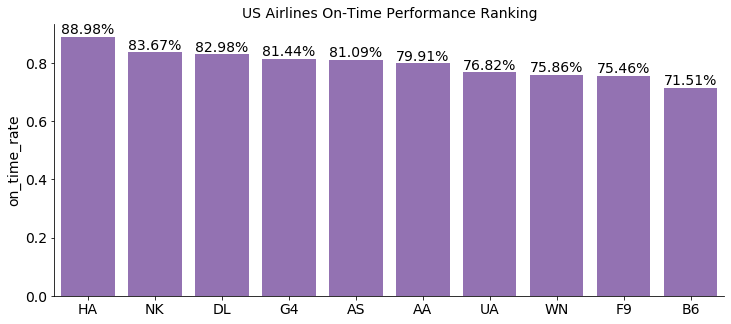

In [19]:

#set plot size and color
plt.figure(figsize = [12,5])
base_color = sb.color_palette()[4]

#create plot
ax = sb.barplot(data = ontime_carrier, x = ontime_carrier.sort_values(by ="on_time_rate", ascending = False)['mkt_carrier'],\
                y = "on_time_rate", color = base_color)


#add value label to each bar
for i, v in enumerate(ontime_carrier.sort_values(by ="on_time_rate", ascending = False)['on_time_rate'].iteritems()):      
    ax.text(i ,v[1], "{:.2%}".format(v[1]), color='black', va ='bottom', ha = 'center')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("US Airlines On-Time Performance Ranking")
plt.xlabel("")
 

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!